<a href="https://colab.research.google.com/github/vilsonrodrigues/DigitalImageProcessing/blob/main/DCA0445/lesson4-histograma/pdi_lesson4_histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read image

In [ ]:
img = plt.imread("Kagaho_de_Bennu.jpg")

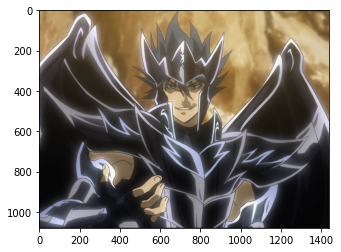

In [ ]:
plt.imshow(img)

In [ ]:
def calculateHist(img):
  # Red
  histR, bins = np.histogram(img[:, :, 0], bins=256, range=(0, 256))

  # Green  
  histG, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 256))

  # Blue
  histB, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 256))
  return histR, histG, histB, bins

In [ ]:
histR, histG, histB, bins = calculateHist(img)

In [ ]:
def plotHist(img, histR, histG, histB, bins):
  f, ax = plt.subplots(3, 1, figsize=(10, 8))

  ax[0].fill_between(bins[:-1], histR, color = 'r')
  ax[1].fill_between(bins[:-1], histG, color = 'g')
  ax[2].fill_between(bins[:-1], histB, color = 'b')

  ax[0].set_xlim([0, 255])
  ax[1].set_xlim([0, 255])
  ax[2].set_xlim([0, 255])

  ax[0].set_ylim([0, 60000])
  ax[1].set_ylim([0, 60000])
  ax[2].set_ylim([0, 60000])

  ax[0].set_title("Red histogram")
  ax[1].set_title("Green histogram")
  ax[2].set_title("Blue histogram")

  plt.suptitle("RGB Histograms", size = 21)
  plt.show()
  return 

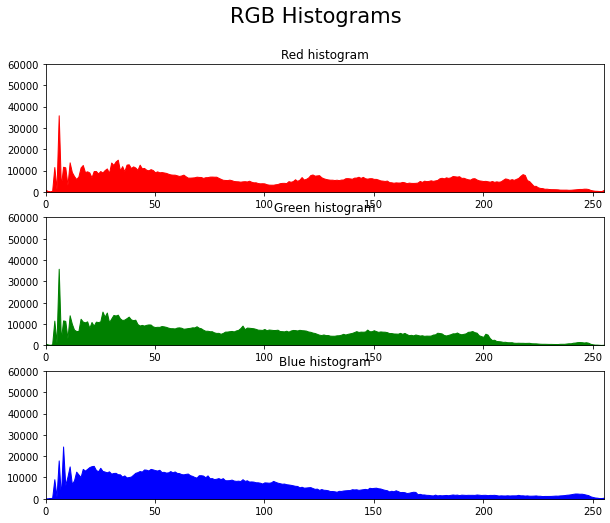

In [ ]:
plotHist(img, histR, histG, histB, bins)

In [ ]:
def histWithOpencv(img, bins):  
  for i in bins[:-1]:
      value = 300 - int(histR[int(i)]/1000)
      cv2.line(img, (int(i), 300), (int(i), value), (0, 0, 255), 1)
      value = 200 - int(histG[int(i)]/1000)
      cv2.line(img, (int(i), 200), (int(i), value), (0, 255, 0), 1)
      value = 100 - int(histR[int(i)]/1000)
      cv2.line(img, (int(i), 100), (int(i), value), (255, 0, 0), 1)
  # Saving the imae with histograms #
  cv2.imwrite("kagaho_hist.jpg", img)      

In [ ]:
histWithOpencv(img, bins)

In [ ]:
imgHist = cv2.imread("kagaho_hist.jpg", cv2.COLOR_BGR2RGB)

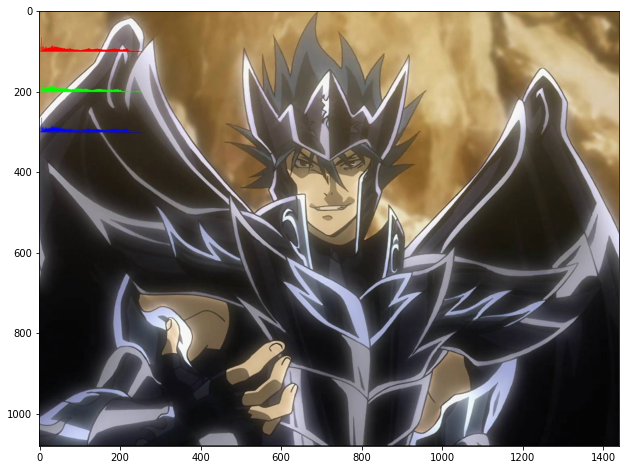

In [ ]:
plt.subplots(figsize=(15, 8))
plt.imshow(imgHist)

In [ ]:
def equalizeHist(img_):
    
    img = img_.copy()
    
    hist, bins = np.histogram(img, bins=256, range=(0, 256))
    
    img_size = img.shape[0]*img.shape[1]
    
    pdf = [0] * 256
    
    for i in range(0, 256):
        pdf[i] = hist[i]/img_size
        
    cdf = [0] * 256
    cdf[0] = pdf[0]
    
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + pdf[i]
         
    new_hist = [0] * 256
    
    cdf = [i* 255 for i in cdf]
    
    new_hist = np.floor(cdf).astype('uint8')
    
    _list = list(img.flatten())
    
    n_list = [new_hist[i] for i in _list]
    
    img = np.reshape(np.asarray(n_list), img.shape)

    return img

Don't open in colab

In [ ]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_ = equalizeHist(gray)
    # Display the resulting frame
    cv2.imshow('frame', gray)
    cv2.imshow('frame equ', gray_)
    if cv2.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Equalize image

In [ ]:
new_img = equalizeHist(img)

# Saving the imae with histograms #
cv2.imwrite("kagaho_equalize.jpg", new_img)

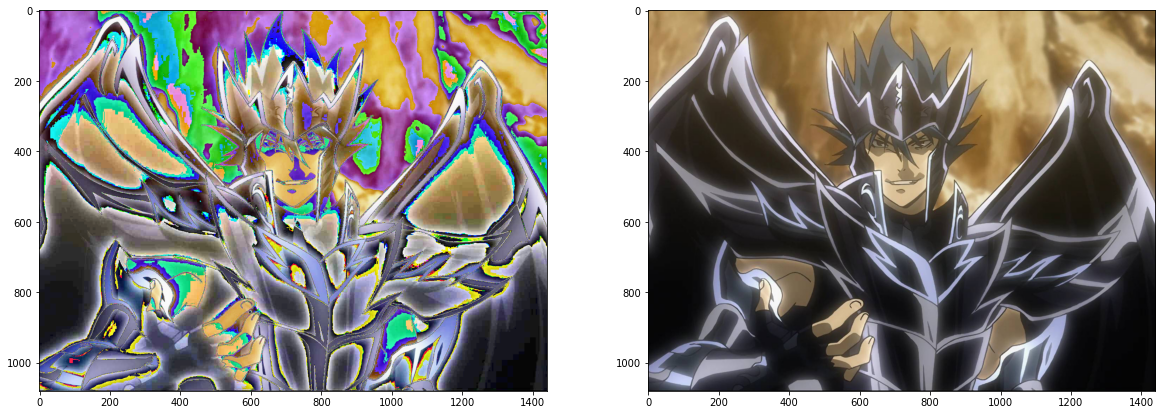

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 15))

ax[0].imshow(new_img, cmap = 'gray')
ax[1].imshow(img, cmap = 'gray')
plt.show()

Detect moviment

if a difference between 2 hist values are too big, display "Moviment Detected"

In [ ]:
def calcHist(img_):
    
    img = img_.copy()
    
    hist, bins = np.histogram(img, bins=256, range=(0, 256))
     
    return hist

In [ ]:
def calcDiff(value1, value2, range_):
    
    diff = value2 - value1
    
    if(diff < 0):
        diff = diff * (-1)
    
    if(diff >= range_):
        return True
    elif(diff < range_):
        return False

In [ ]:
import collections 
cap = cv2.VideoCapture(0)

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
previous_hist = calcHist(gray)

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Check Moviment 
    actual_hist = calcHist(gray)
    counter = 0
    for i in range(actual_hist.shape[0]):
        if(calcDiff(actual_hist[i], previous_hist[i], 100)):
            counter += 1
    if(counter >= 80):
        print("Moviment Detected!")
    previous_hist = actual_hist.copy()
        
    # Display the resulting frame
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()